In [3]:
#importing the required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as nr
import sklearn.model_selection as ms
import seaborn as sns
from sklearn.model_selection import cross_validate
import sklearn.metrics as sklm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn import preprocessing
import math
import scipy.stats as ss
from sklearn import feature_selection as fs

%matplotlib inline

In [4]:
#reading the train and test files in

features = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
print(test.shape)
print(features.shape)

(16496, 18)
(38312, 19)


In [5]:
#recreating new features/columns

def new_name(data, cols):
    for col in cols:
        data[col + '_Str'] = data[col].astype(str)
    
cols = ['Year_of_birth', 'Year_of_recruitment']
new_name(features, cols)
new_name(test, cols)

In [6]:
#dropping unwanted features/columns

features = features.drop(['Year_of_recruitment', 'Year_of_birth'], axis = 1)
test = test.drop(['Year_of_recruitment', 'Year_of_birth'], axis = 1)

print(features.shape)
print(test.shape)

(38312, 19)
(16496, 18)


# DATA VISUALIZATION

In [7]:
#checking the amount of unique values in each feature

def value_count(data, cols):
    for col in cols:
        value = data[col].value_counts().count()
        print('\n' + 'For column' + '                                     ' + col)
        print(value)
        
colss = ['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
       'Trainings_Attended', 'Year_of_birth_Str', 'Last_performance_score', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Year_of_birth_Str']


value_count(features, colss)


For column                                     Division
9

For column                                     Qualification
3

For column                                     Gender
2

For column                                     Channel_of_Recruitment
3

For column                                     Trainings_Attended
10

For column                                     Year_of_birth_Str
49

For column                                     Last_performance_score
6

For column                                     Targets_met
2

For column                                     Previous_Award
2

For column                                     Training_score_average
61

For column                                     State_Of_Origin
37

For column                                     Foreign_schooled
2

For column                                     Marital_Status
3

For column                                     Past_Disciplinary_Action
2

For column                                     Previous_Int

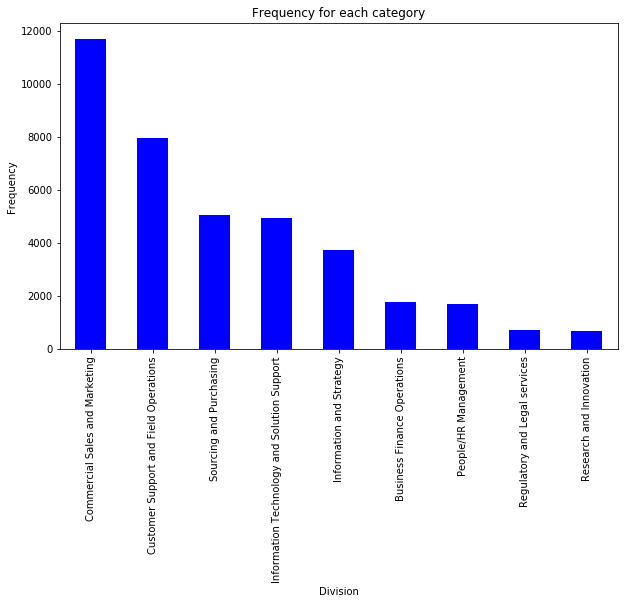

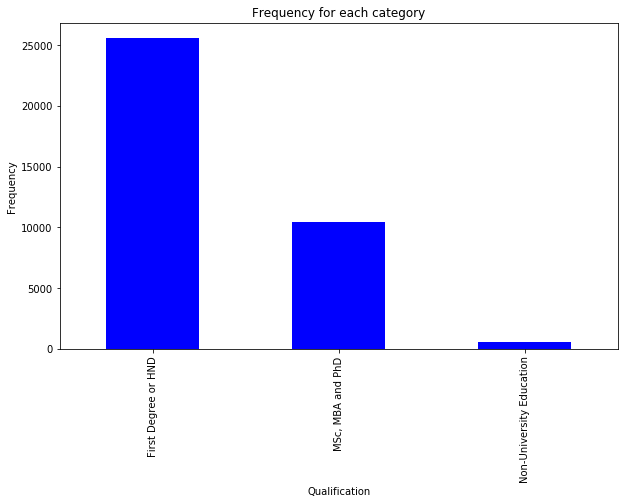

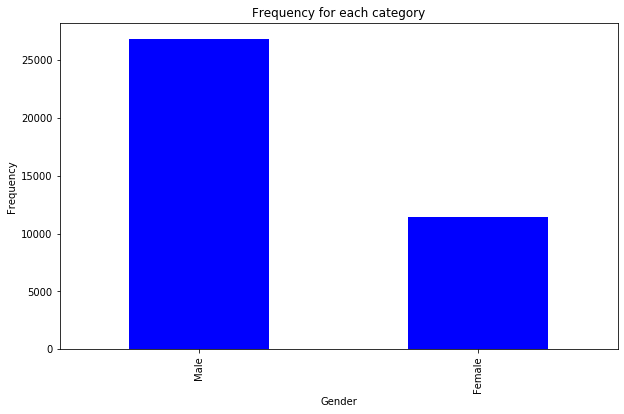

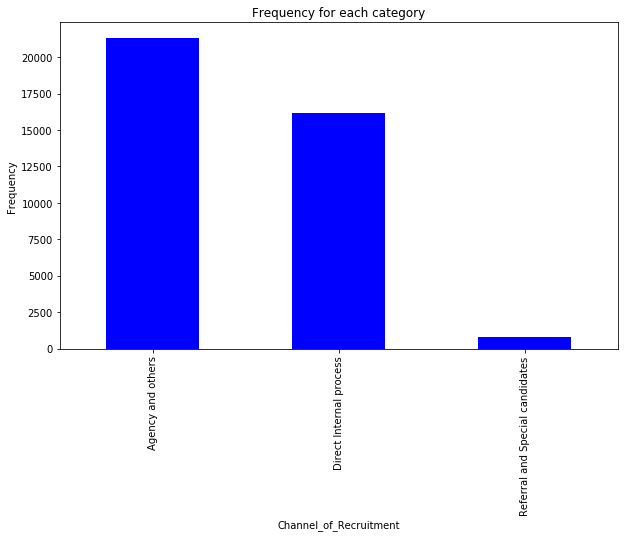

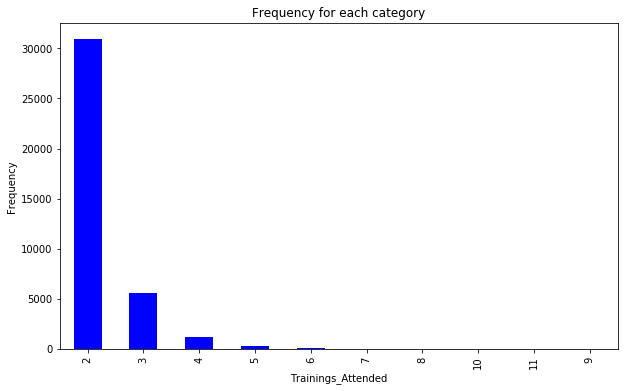

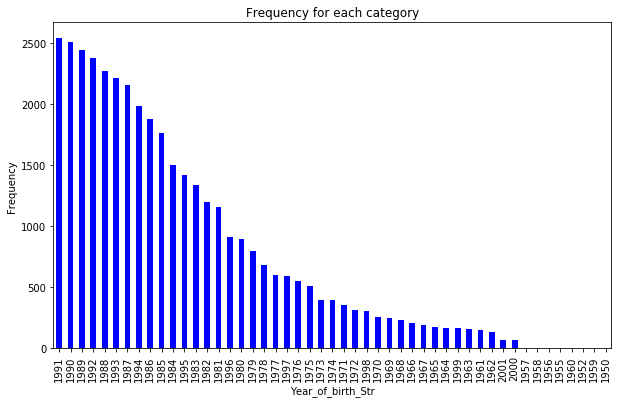

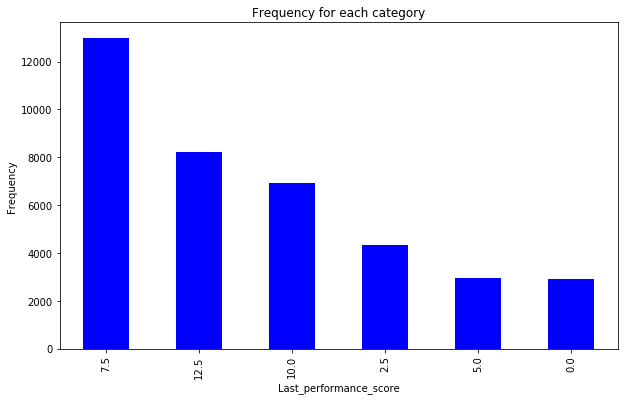

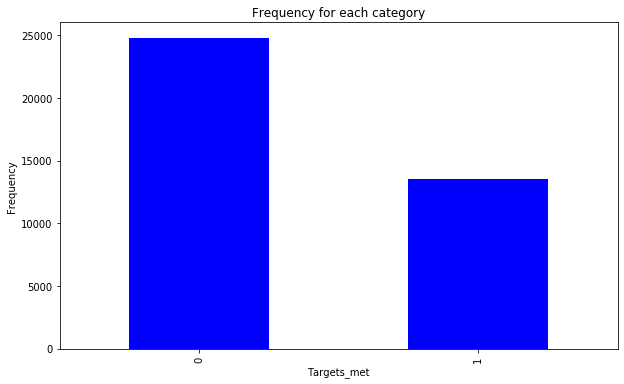

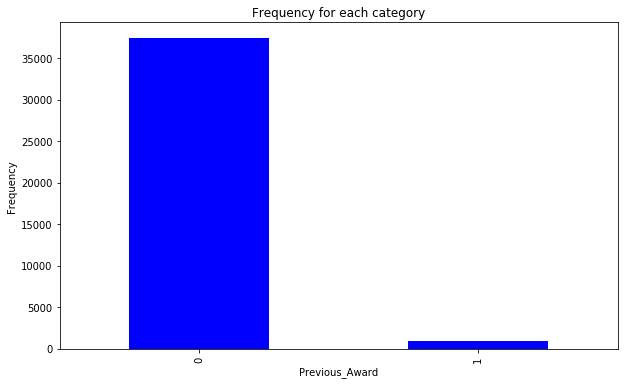

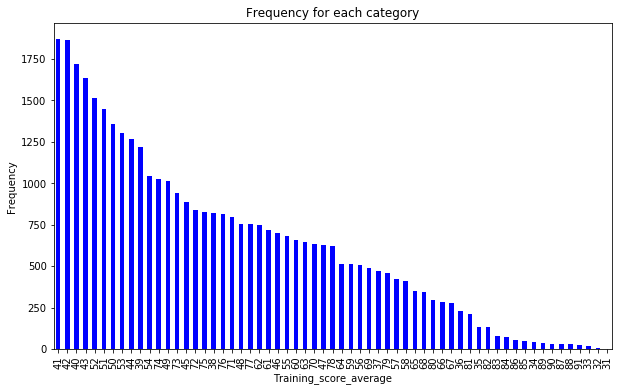

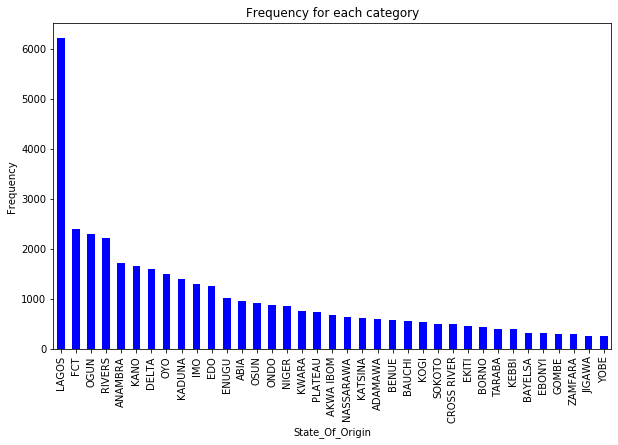

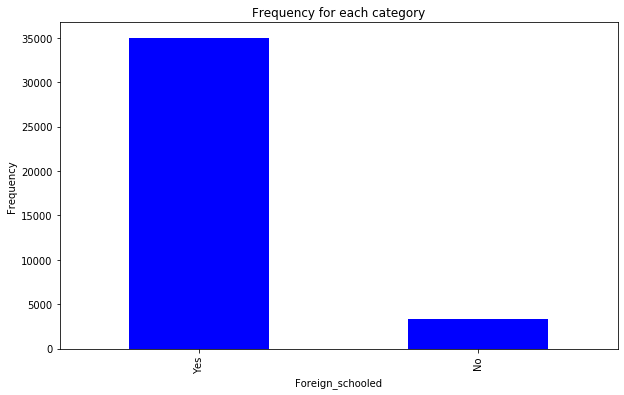

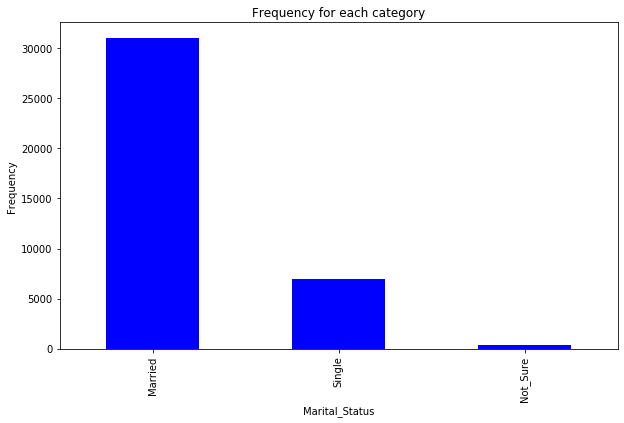

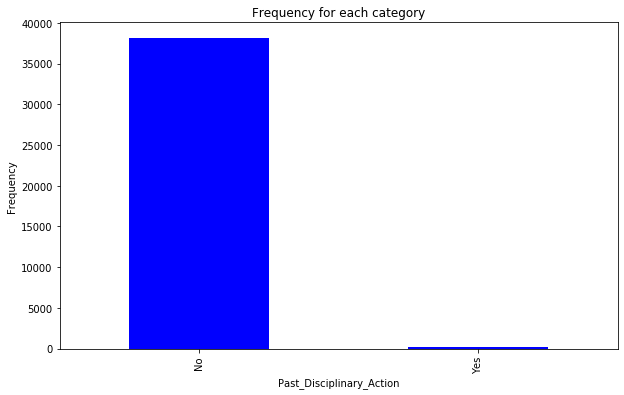

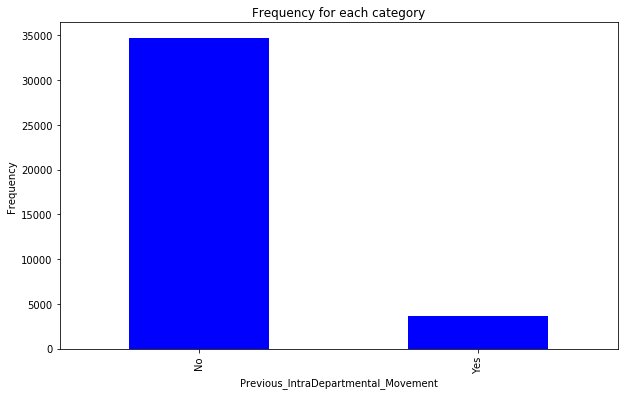

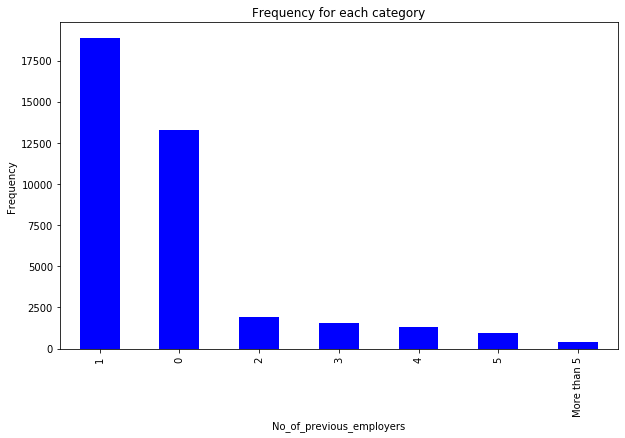

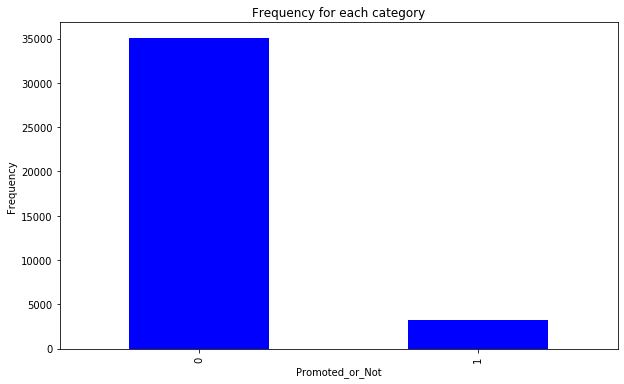

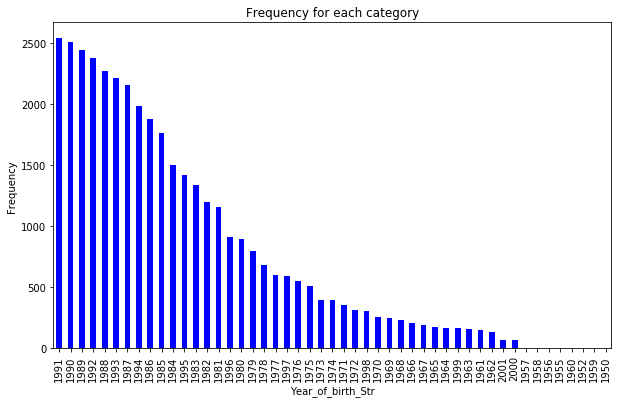

In [8]:
#checking frequency of each feature using bar chart
def plot_bar(data, cols):
    for col in cols:
        ax = data[col].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Frequency for each category", color= 'b')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
plot_bar(features, colss)

# Further Data Preparation

In [8]:
#aggregating categorical variables
#grouping the years into similar categories using a dictionary and list comprehension

year_categories = {'1991': '1990-2001', '1990': '1990-2001', '1989': '1980-1989', '1992': '1990-2001',
                   '1988': '1980-1989', '1987': '1980-1989', '1993': '1990-2001', '1994': '1990-2001',
                  '1986': '1980-1989', '1985': '1980-1989', '1984': '1980-1989', '1995': '1990-2001', 
                  '1983': '1980-1989', '1982': '1980-1989', '1981': '1980-1989', '1980': '1980-1989',
                  '1996': '1990-2001', '1979': '1970-1979', '1978': '1970-1979', '1977': '1970-1979',
                   '1976': '1970-1979', '1975': '1970-1979', '1997': '1990-2001', '1973': '1970-1979',
                   '1974': '1970-1979', '1971': '1970-1979', '1972': '1970-1979', '1970': '1970-1979',
                   '1969': '1950-1969', '1968': '1950-1969', '1998': '1990-2001', '1966': '1950-1969',
                   '1967': '1950-1969', '1965': '1950-1969', '1964': '1950-1969', '1963': '1950-1969',
                   '1961': '1950-1969', '1962': '1950-1969', '1999': '1990-2001', '2001': '1990-2001',
                   '2000': '1990-2001', '1957': '1950-1969', '1956': '1950-1969', '1955': '1950-1969',
                   '1950': '1950-1969', '1952':'1950-1969', '1958': '1950-1969', '1959': '1950-1969',
                   '1960': '1950-1969'}

features['Year_of_birth_Str'] = [year_categories[x] for x in features['Year_of_birth_Str']]
print(features['Year_of_birth_Str'].value_counts())

test['Year_of_birth_Str'] = [year_categories[x] for x in test['Year_of_birth_Str']]
print(test['Year_of_birth_Str'].value_counts())

1980-1989    16611
1990-2001    15163
1970-1979     4853
1950-1969     1685
Name: Year_of_birth_Str, dtype: int64
1980-1989    7172
1990-2001    6489
1970-1979    2057
1950-1969     778
Name: Year_of_birth_Str, dtype: int64


In [9]:
year_categories1 = {'1982': '1982-2000', '1985': '1982-2000', '1986': '1982-2000', '1987': '1982-2000', '1988': '1982-2000', '1989': '1982-2000',
                    '1990': '1982-2000', '1991': '1982-2000', '1992': '1982-2000', '1993': '1982-2000', 
                   '1994': '1982-2000', '1995': '1982-2000', '1996': '1982-2000', '1997': '1982-2000', 
                   '1998': '1982-2000', '1999': '1982-2000', '2000': '1982-2000', '2001': '2001-2005', 
                   '2002': '2001-2005', '2003': '2001-2005', '2004': '2001-2005', '2005': '2001-2005', 
                   '2006': '2006-2010', '2007': '2006-2010', '2008': '2006-2010', '2009': '2006-2010', 
                   '2010': '2006-2010', '2011': '2011-2015', '2012': '2011-2015', '2013': '2011-2015', 
                   '2014': '2011-2015', '2015': '2011-2015', '2016': '2016-2018', '2017': '2016-2018', 
                   '2018': '2016-2018'}

features['Year_of_recruitment_Str'] = [year_categories1[x] for x in features['Year_of_recruitment_Str']]
print(features['Year_of_recruitment_Str'].value_counts())

test['Year_of_recruitment_Str'] = [year_categories1[x] for x in test['Year_of_recruitment_Str']]
print(test['Year_of_recruitment_Str'].value_counts())

2011-2015    18092
2016-2018    12766
2006-2010     5023
2001-2005     1754
1982-2000      677
Name: Year_of_recruitment_Str, dtype: int64
2011-2015    7744
2016-2018    5498
2006-2010    2196
2001-2005     760
1982-2000     298
Name: Year_of_recruitment_Str, dtype: int64


In [10]:
#aggregating the states into similar states

states = {'ABIA': 'EAST', 'ANAMBRA': 'EAST', 'DELTA': 'EAST', 'BAYELSA': 'EAST',
         'ENUGU': 'EAST', 'EBONYI': 'EAST', 'RIVERS': 'EAST', 'CROSS RIVER': 'EAST',
         'AKWA IBOM': 'EAST', 'IMO': 'EAST', 'KATSINA': 'NORTH', 'KANO': 'NORTH', 'NIGER': 'NORTH',
         'SOKOTO': 'NORTH', 'KANO': 'NORTH', 'KADUNA': 'NORTH', 'BORNO': 'NORTH', 'TARABA':'NORTH',
         'YOBE': 'NORTH', 'ADAMAWA': 'NORTH', 'KEBBI': 'NORTH', 'JIGAWA': 'NORTH', 'ZAMFARA': 'NORTH',
         'KEBBI': 'NORTH', 'PLATEAU': 'NORTH', 'NASSARAWA': 'NORTH', 'FCT': 'NORTH', 'PLATEAU': 'NORTH',
         'BENUE': 'NORTH', 'KOGI':'NORTH', 'BAUCHI': 'NORTH', 'GOMBE': 'NORTH', 'OYO': 'WEST', 'LAGOS': 'WEST', 'OGUN': 'WEST',
         'OSUN': 'WEST', 'EKITI': 'WEST', 'ONDO': 'WEST', 'KWARA': 'WEST', 'EDO': 'WEST'}

features['State_Of_Origin'] = [states[x] for x in features['State_Of_Origin']]
print(features['State_Of_Origin'].value_counts())

test['State_Of_Origin'] = [states[x] for x in test['State_Of_Origin']]
print(test['State_Of_Origin'].value_counts())

WEST     14297
NORTH    13402
EAST     10613
Name: State_Of_Origin, dtype: int64
WEST     6259
NORTH    5684
EAST     4553
Name: State_Of_Origin, dtype: int64


In [11]:
#checking the label counts to check for class inbalance

label_count = features['Promoted_or_Not'].value_counts()
label_count

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [12]:
#creating the label into an array matrix

Labels = np.array(features['Promoted_or_Not'])

In [13]:
#Encoding categorical variables

def encode_string(data):
    enc = preprocessing.LabelEncoder()
    enc.fit(data)
    enc_features = enc.transform(data)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_features.reshape(-1,1))
    return encoded.transform(enc_features.reshape(-1,1)).toarray()
    
categorical_columns = ['Gender', 'Channel_of_Recruitment', 'State_Of_Origin',
                       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
                       'Year_of_birth_Str', 'Year_of_recruitment_Str']
Features_enc = encode_string(features['Division'])
for col in categorical_columns:
    temp = encode_string(features[col])
    Features_enc = np.concatenate([Features_enc, temp], axis = 1)
    
print(Features_enc.shape)

test_enc = encode_string(test['Division'])
for col in categorical_columns:
    temps = encode_string(test[col])
    test_enc = np.concatenate([test_enc, temps], axis = 1)
    
print(test_enc.shape)

(38312, 35)
(16496, 35)


In [14]:
features.isna().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Last_performance_score                    0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
Year_of_birth_Str                         0
Year_of_recruitment_Str                   0
dtype: int64

In [12]:
#concatenating the numerical variables with the categorical variables

Features_enc = np.concatenate([Features_enc, np.array(features[['Trainings_Attended', 'Last_performance_score',
                                                              'Targets_met', 'Previous_Award', 'Training_score_average']])], axis = 1)

print(Features_enc.shape)

test_enc = np.concatenate([test_enc, np.array(test[['Trainings_Attended', 'Last_performance_score',
                                                              'Targets_met', 'Previous_Award', 'Training_score_average']])], axis = 1)

print(test_enc.shape)

(38312, 40)
(16496, 40)


In [13]:
#using StandardScaler function to scale the numeric features 

scaler = preprocessing.StandardScaler().fit(Features_enc[:, 36:])
Features_enc[:, 36:] = scaler.transform(Features_enc[:, 36:])
Features_enc[:, 31:]

array([[ 0.        ,  0.        ,  1.        , ...,  1.35384256,
        -0.15395043, -1.07512768],
       [ 0.        ,  0.        ,  1.        , ..., -0.73863832,
        -0.15395043, -0.25193251],
       [ 0.        ,  0.        ,  1.        , ..., -0.73863832,
        -0.15395043, -1.00029176],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.35384256,
        -0.15395043,  1.16995006],
       [ 0.        ,  0.        ,  0.        , ..., -0.73863832,
        -0.15395043, -1.37447138],
       [ 0.        ,  0.        ,  1.        , ..., -0.73863832,
        -0.15395043, -1.07512768]])

In [14]:
test_enc[:, 36:] = scaler.transform(test_enc[:, 36:])
test_enc[:, 36]

array([-0.05313941, -2.05629819, -0.05313941, ...,  1.28229978,
       -1.3885786 , -0.05313941])

In [15]:
#encoding the year of birth category

birth_encoded = encode_string(features['Year_of_birth_Str'])
birth_encoded_test = encode_string(test['Year_of_birth_Str'])

In [16]:
#concatenating the year of birth(encoded) to the rest of the features

Features_enc = np.concatenate([Features_enc, birth_encoded], axis = 1)
print(Features_enc.shape)

test_enc = np.concatenate([test_enc, birth_encoded_test], axis = 1)
print(test_enc.shape)

(38312, 44)
(16496, 44)


In [17]:
#aggregating the number of previous employers

employers = {'0': '0-1', '1': '0-1', '2': '2-3', '3': '2-3',
             '4': 'Greater than 3', '5': 'Greater than 3', 'More than 5': 'Greater than 5'}

features['No_of_previous_employers'] = [employers[x] for x in features['No_of_previous_employers']]
test['No_of_previous_employers'] = [employers[x] for x in test['No_of_previous_employers']]

print(features['No_of_previous_employers'].value_counts())
print(test['No_of_previous_employers'].value_counts())

0-1               32139
2-3                3505
Greater than 3     2267
Greater than 5      401
Name: No_of_previous_employers, dtype: int64
0-1               13931
2-3                1469
Greater than 3      940
Greater than 5      156
Name: No_of_previous_employers, dtype: int64


In [18]:
#encoding the number of previous employers(encoded) category

employers_encodedd = encode_string(features['No_of_previous_employers'])
employers_encoded_testt = encode_string(test['No_of_previous_employers'])

In [19]:
Features_enc = np.concatenate([Features_enc, employers_encodedd], axis = 1)
print(Features_enc.shape)

test_enc = np.concatenate([test_enc, employers_encoded_testt], axis = 1)
print(test_enc.shape)

(38312, 48)
(16496, 48)


In [25]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features_enc.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
x_train = Features_enc[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features_enc[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [26]:
## Randomly sample cases to create independent training and test data
np.random.seed(9988)
indx1 = range(x_test.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.5)
x_test1 = x_test[indx1[0],:]
y_test1 = np.ravel(y_test[indx1[0]])
x_test2 = x_test[indx1[1],:]
y_test2 = np.ravel(y_test[indx1[1]])

In [23]:
#importing XGBoost classifier 

import xgboost as xgb

In [24]:
xg_cl1 = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 4000, seed = 123, max_depth = 8,
                           learning_rate=0.01, booster = 'gbtree', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

In [27]:
eval_set = [(x_test1, y_test1)]
xg_cl1.fit(x_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

[0]	validation_0-auc:0.86176
Will train until validation_0-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.88153
[2]	validation_0-auc:0.88188
[3]	validation_0-auc:0.88472
[4]	validation_0-auc:0.88578
[5]	validation_0-auc:0.89205
[6]	validation_0-auc:0.89268
[7]	validation_0-auc:0.89413
[8]	validation_0-auc:0.89488
[9]	validation_0-auc:0.89493
[10]	validation_0-auc:0.89507
[11]	validation_0-auc:0.89630
[12]	validation_0-auc:0.89759
[13]	validation_0-auc:0.89777
[14]	validation_0-auc:0.89756
[15]	validation_0-auc:0.89758
[16]	validation_0-auc:0.89792
[17]	validation_0-auc:0.89873
[18]	validation_0-auc:0.89870
[19]	validation_0-auc:0.89932
[20]	validation_0-auc:0.89958
[21]	validation_0-auc:0.89978
[22]	validation_0-auc:0.90011
[23]	validation_0-auc:0.89994
[24]	validation_0-auc:0.89975
[25]	validation_0-auc:0.89975
[26]	validation_0-auc:0.89989
[27]	validation_0-auc:0.90072
[28]	validation_0-auc:0.90076
[29]	validation_0-auc:0.90060
[30]	validation_0-auc:0.90058
[31]	validation

[266]	validation_0-auc:0.90562
[267]	validation_0-auc:0.90572
[268]	validation_0-auc:0.90570
[269]	validation_0-auc:0.90575
[270]	validation_0-auc:0.90569
[271]	validation_0-auc:0.90570
[272]	validation_0-auc:0.90567
[273]	validation_0-auc:0.90561
[274]	validation_0-auc:0.90560
[275]	validation_0-auc:0.90560
[276]	validation_0-auc:0.90561
[277]	validation_0-auc:0.90567
[278]	validation_0-auc:0.90555
[279]	validation_0-auc:0.90555
[280]	validation_0-auc:0.90556
[281]	validation_0-auc:0.90543
[282]	validation_0-auc:0.90540
[283]	validation_0-auc:0.90534
[284]	validation_0-auc:0.90540
[285]	validation_0-auc:0.90533
[286]	validation_0-auc:0.90534
[287]	validation_0-auc:0.90534
[288]	validation_0-auc:0.90531
[289]	validation_0-auc:0.90533
[290]	validation_0-auc:0.90536
[291]	validation_0-auc:0.90541
[292]	validation_0-auc:0.90543
[293]	validation_0-auc:0.90540
[294]	validation_0-auc:0.90542
[295]	validation_0-auc:0.90546
[296]	validation_0-auc:0.90545
[297]	validation_0-auc:0.90540
[298]	va

[531]	validation_0-auc:0.90948
[532]	validation_0-auc:0.90952
[533]	validation_0-auc:0.90957
[534]	validation_0-auc:0.90949
[535]	validation_0-auc:0.90950
[536]	validation_0-auc:0.90953
[537]	validation_0-auc:0.90952
[538]	validation_0-auc:0.90954
[539]	validation_0-auc:0.90956
[540]	validation_0-auc:0.90953
[541]	validation_0-auc:0.90950
[542]	validation_0-auc:0.90952
[543]	validation_0-auc:0.90950
[544]	validation_0-auc:0.90947
[545]	validation_0-auc:0.90948
[546]	validation_0-auc:0.90948
[547]	validation_0-auc:0.90948
[548]	validation_0-auc:0.90942
[549]	validation_0-auc:0.90943
[550]	validation_0-auc:0.90946
[551]	validation_0-auc:0.90950
[552]	validation_0-auc:0.90952
[553]	validation_0-auc:0.90948
[554]	validation_0-auc:0.90950
[555]	validation_0-auc:0.90949
[556]	validation_0-auc:0.90943
[557]	validation_0-auc:0.90947
[558]	validation_0-auc:0.90948
[559]	validation_0-auc:0.90948
[560]	validation_0-auc:0.90950
[561]	validation_0-auc:0.90947
[562]	validation_0-auc:0.90951
[563]	va

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=4000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=0.03, scale_pos_weight=1, seed=123, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
#making predictions on the test data

preds1 = xg_cl1.predict(test_enc)

In [31]:
#preparing the predictions make into the sample file for submission

sample1 = pd.read_csv('sample_submission2.csv')
sample1.EmployeeNo = test.EmployeeNo
sample1.Promoted_or_Not = preds1
sample1.to_csv('intercampus1.csv', index = False)

In [28]:
pred = xg_cl1.predict(x_test2)

In [31]:
confusion_matrix(pred, y_test2)

array([[5229,  337],
       [  10,  171]])

In [33]:
accuracy_score(pred, y_test2)

0.9396206716547764